# Comparison of Regression Algorithms
## Overview
A machine learning based regression algorithm determines the parameters of a functional in a way that the data is approximated w.r.t. to an loss function. The loss is minimized in a way, that the prediction error $e$ is as small as possible according to a given loss function, e.g.

$\sum_{i=1}^{n} e_i^2;\;\textrm{Sum of squared prediction errors}\\
\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.\\
\sum_{i=1}^{n} |e_i|;\;\textrm{Sum of absolute prediction errors}\\
\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.\\
$

To estimate the $k$-parameters $\beta$ of the function, a dataset of $M$ observations are taken.

$ N := \operatorname{card}(M) = \begin{cases}N<k;\;\textrm{Parameters cannot be estimated}\\
N=k;\;\textrm{Parameters can be definitely calculated}\\
N>k;\;\textrm{Parameters can be calculated as overdetermined system}\end{cases}$

## Simple Case: Linear Regression
Linear Regression finds the best matching line (or hyperplane in higher dimensional feature space).
$Y := \{ y_0, \ldots , y_{n-1}\};\;\textrm{Responses}\\
X := \{ X_0, \ldots , X_{n-1}\};\;\textrm{Vectors of explanatory variables}\\
F_i := \{ y_i, x_{i0}, \ldots , x_{im-1}\};\;\textrm{Feature Vector}\\ 
\Rightarrow \;\textrm{Prediction Function with error term}\\
y_i = \alpha_0 + x_{i0}\beta_0 + x_{i1}\beta_1 + \ldots + x_{im-1} \beta_{m-1} + \varepsilon_i$

## Working example
We compare multiple regression algorithms for a given set of observations

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

never = False

In [2]:
import seaborn as sns
sns.set()

## Create the input data
This creates a set of observations 

In [3]:
def true_func(X):
    return np.cos(1.5 * np.pi * X)

In [4]:
def sampled_func(X):
    val = true_func(X)
    return val+(0.5*(random.random()-0.25)*val)

In [5]:
np.random.seed(0)

n_samples = 100
X = np.sort(10*np.random.rand(n_samples)-5, axis=0)
X = X.reshape(n_samples, 1)
y_true = true_func(X)
y_sampled = sampled_func(X).ravel()


### Shuffle the data in order to make the training set contain values from the complete definition range
The process of splitting the dataset into test and training set must ensure, that the test set is containing elements from the complete value range of observations. Hence, a simple percentage split of the (sorted) observations is not sufficient. Instead, data must be shuffled first

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_sampled, test_size=0.20, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y_sampled, test_size=0.20)
print(X_test)
print(y_test.shape)

[[ 2.91725038]
 [ 0.2889492 ]
 [ 1.56329589]
 [-0.62412789]
 [-0.62968046]
 [-1.31274829]
 [-3.38690482]
 [ 2.74233689]
 [-4.03901592]
 [-4.95304524]
 [-3.68202138]
 [-2.34610509]
 [ 1.7063787 ]
 [-2.03859802]
 [ 3.91773001]
 [-4.60812208]
 [ 1.97631196]
 [ 2.15189366]
 [-3.97955189]
 [-2.17193037]]
(20,)


### Sort the test set again, to have proper drawing in the visualizations

In [7]:
idx = np.argsort(X_test, axis=0)
print(idx)
X_test = np.sort(X_test, axis=0)
print(X_test)
print(idx.flatten())
y_test = [y_test[i][0] for i in idx]
print(y_test)

[[ 9]
 [15]
 [ 8]
 [18]
 [10]
 [ 6]
 [11]
 [19]
 [13]
 [ 5]
 [ 4]
 [ 3]
 [ 1]
 [ 2]
 [12]
 [16]
 [17]
 [ 7]
 [ 0]
 [14]]
[[-4.95304524]
 [-4.60812208]
 [-4.03901592]
 [-3.97955189]
 [-3.68202138]
 [-3.38690482]
 [-2.34610509]
 [-2.17193037]
 [-2.03859802]
 [-1.31274829]
 [-0.62968046]
 [-0.62412789]
 [ 0.2889492 ]
 [ 1.56329589]
 [ 1.7063787 ]
 [ 1.97631196]
 [ 2.15189366]
 [ 2.74233689]
 [ 2.91725038]
 [ 3.91773001]]
[ 9 15  8 18 10  6 11 19 13  5  4  3  1  2 12 16 17  7  0 14]
[-0.20230107213553702, -0.8869220004515714, 0.90624351819337, 0.9175034053167765, 0.0666393504044695, -0.8925622929970456, 0.05544426382856053, -0.6354301259048637, -0.906573632353251, 0.9174459878847154, -0.9078139356439201, -0.9033210991935573, 0.191392488074399, 0.431471836418558, -0.17149537489618039, -0.916042498463447, -0.6955566676424139, 0.8637935901082063, 0.350405897168072, 0.8533701201477835]


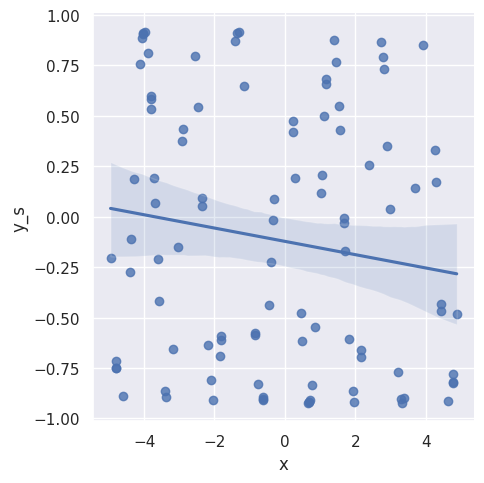

In [8]:
df = pd.DataFrame(X)
df["y_s"] = y_sampled
df = df.rename(columns={0: "x"})
sns.lmplot(data = df, x ="x", y="y_s")

In [9]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_traces(go.Scatter(x=X_train.ravel(), y=y_train,
                          mode = 'markers',
                          marker = {'color' : 'red'}
                         ))
fig.add_traces(go.Scatter(x=X_test.ravel(), y=y_test,
                          mode = 'markers',
                          marker = {'color' : 'blue'}
                         ))
fig.show()

## Train a regression tree with a depth of your choice and check the prediction performance

In [10]:
dtree = DecisionTreeRegressor(max_depth=15)

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [12]:
cv_results = cross_validate(dtree, X_train, y_train, cv=3, n_jobs=-1, return_estimator=True)

In [13]:
best_clf = cv_results["estimator"][cv_results["test_score"].argmax()]

## Predict the test data and measure the performance

In [14]:
y_pred = best_clf.predict(X_test)

In [15]:
y_mse_tree = mean_squared_error(y_test, y_pred)
y_mae_tree = mean_absolute_error(y_test, y_pred)

In [16]:
print(f"mse = {y_mse_tree}\nmae = {y_mae_tree}")

mse = 0.05921841474295595
mae = 0.1680054839159634


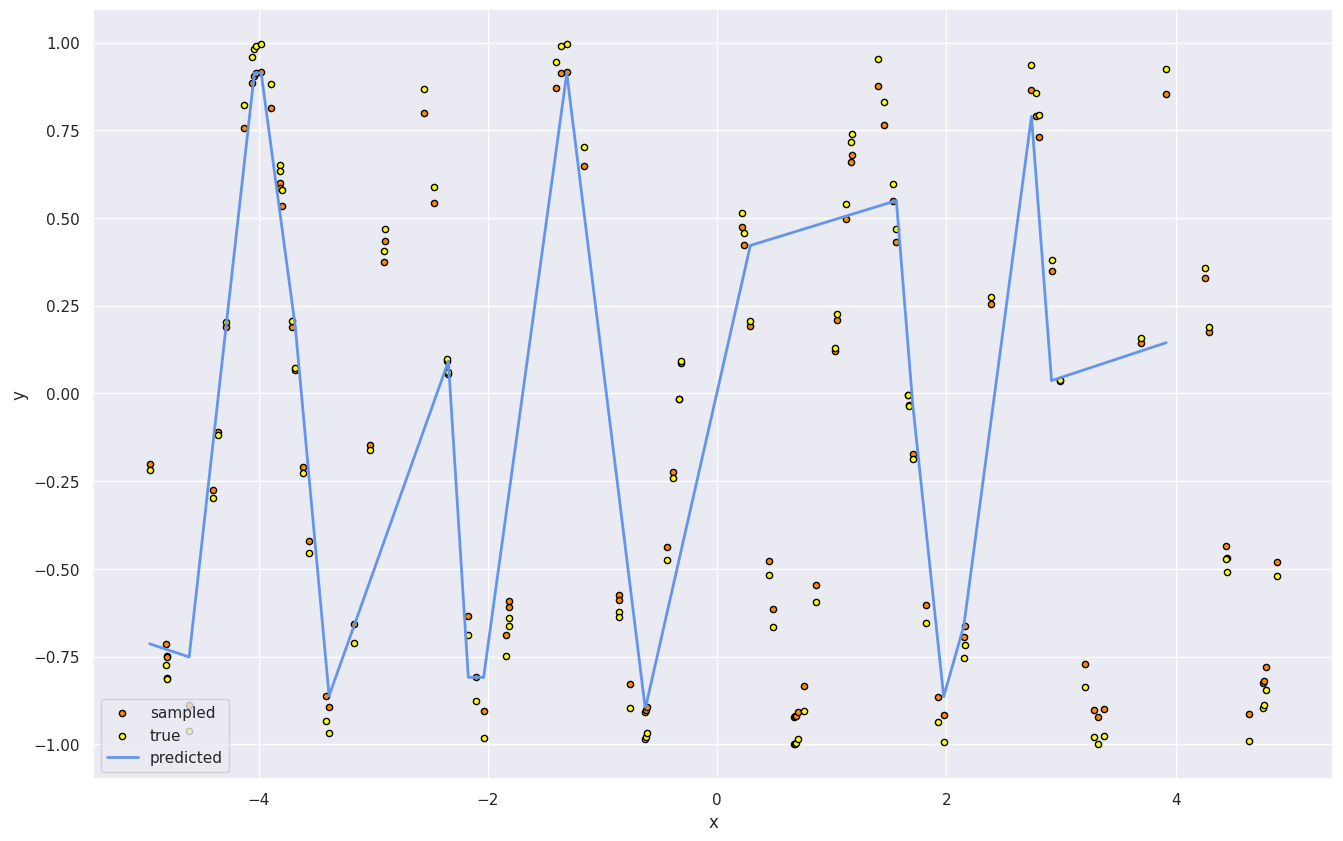

In [17]:
y_pred2 = dtree.predict(X_test)
fig, ax = plt.subplots(figsize=(16,10))
plt.scatter(X, y_sampled, s=20, edgecolor="black",
                c="darkorange", label="sampled")
plt.scatter(X, y_true, s=20, edgecolor="black",
                c="yellow", label="true")
plt.plot(X_test, y_pred2, color="cornflowerblue",
             label="predicted", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
ax.legend(loc="lower left")
plt.show()

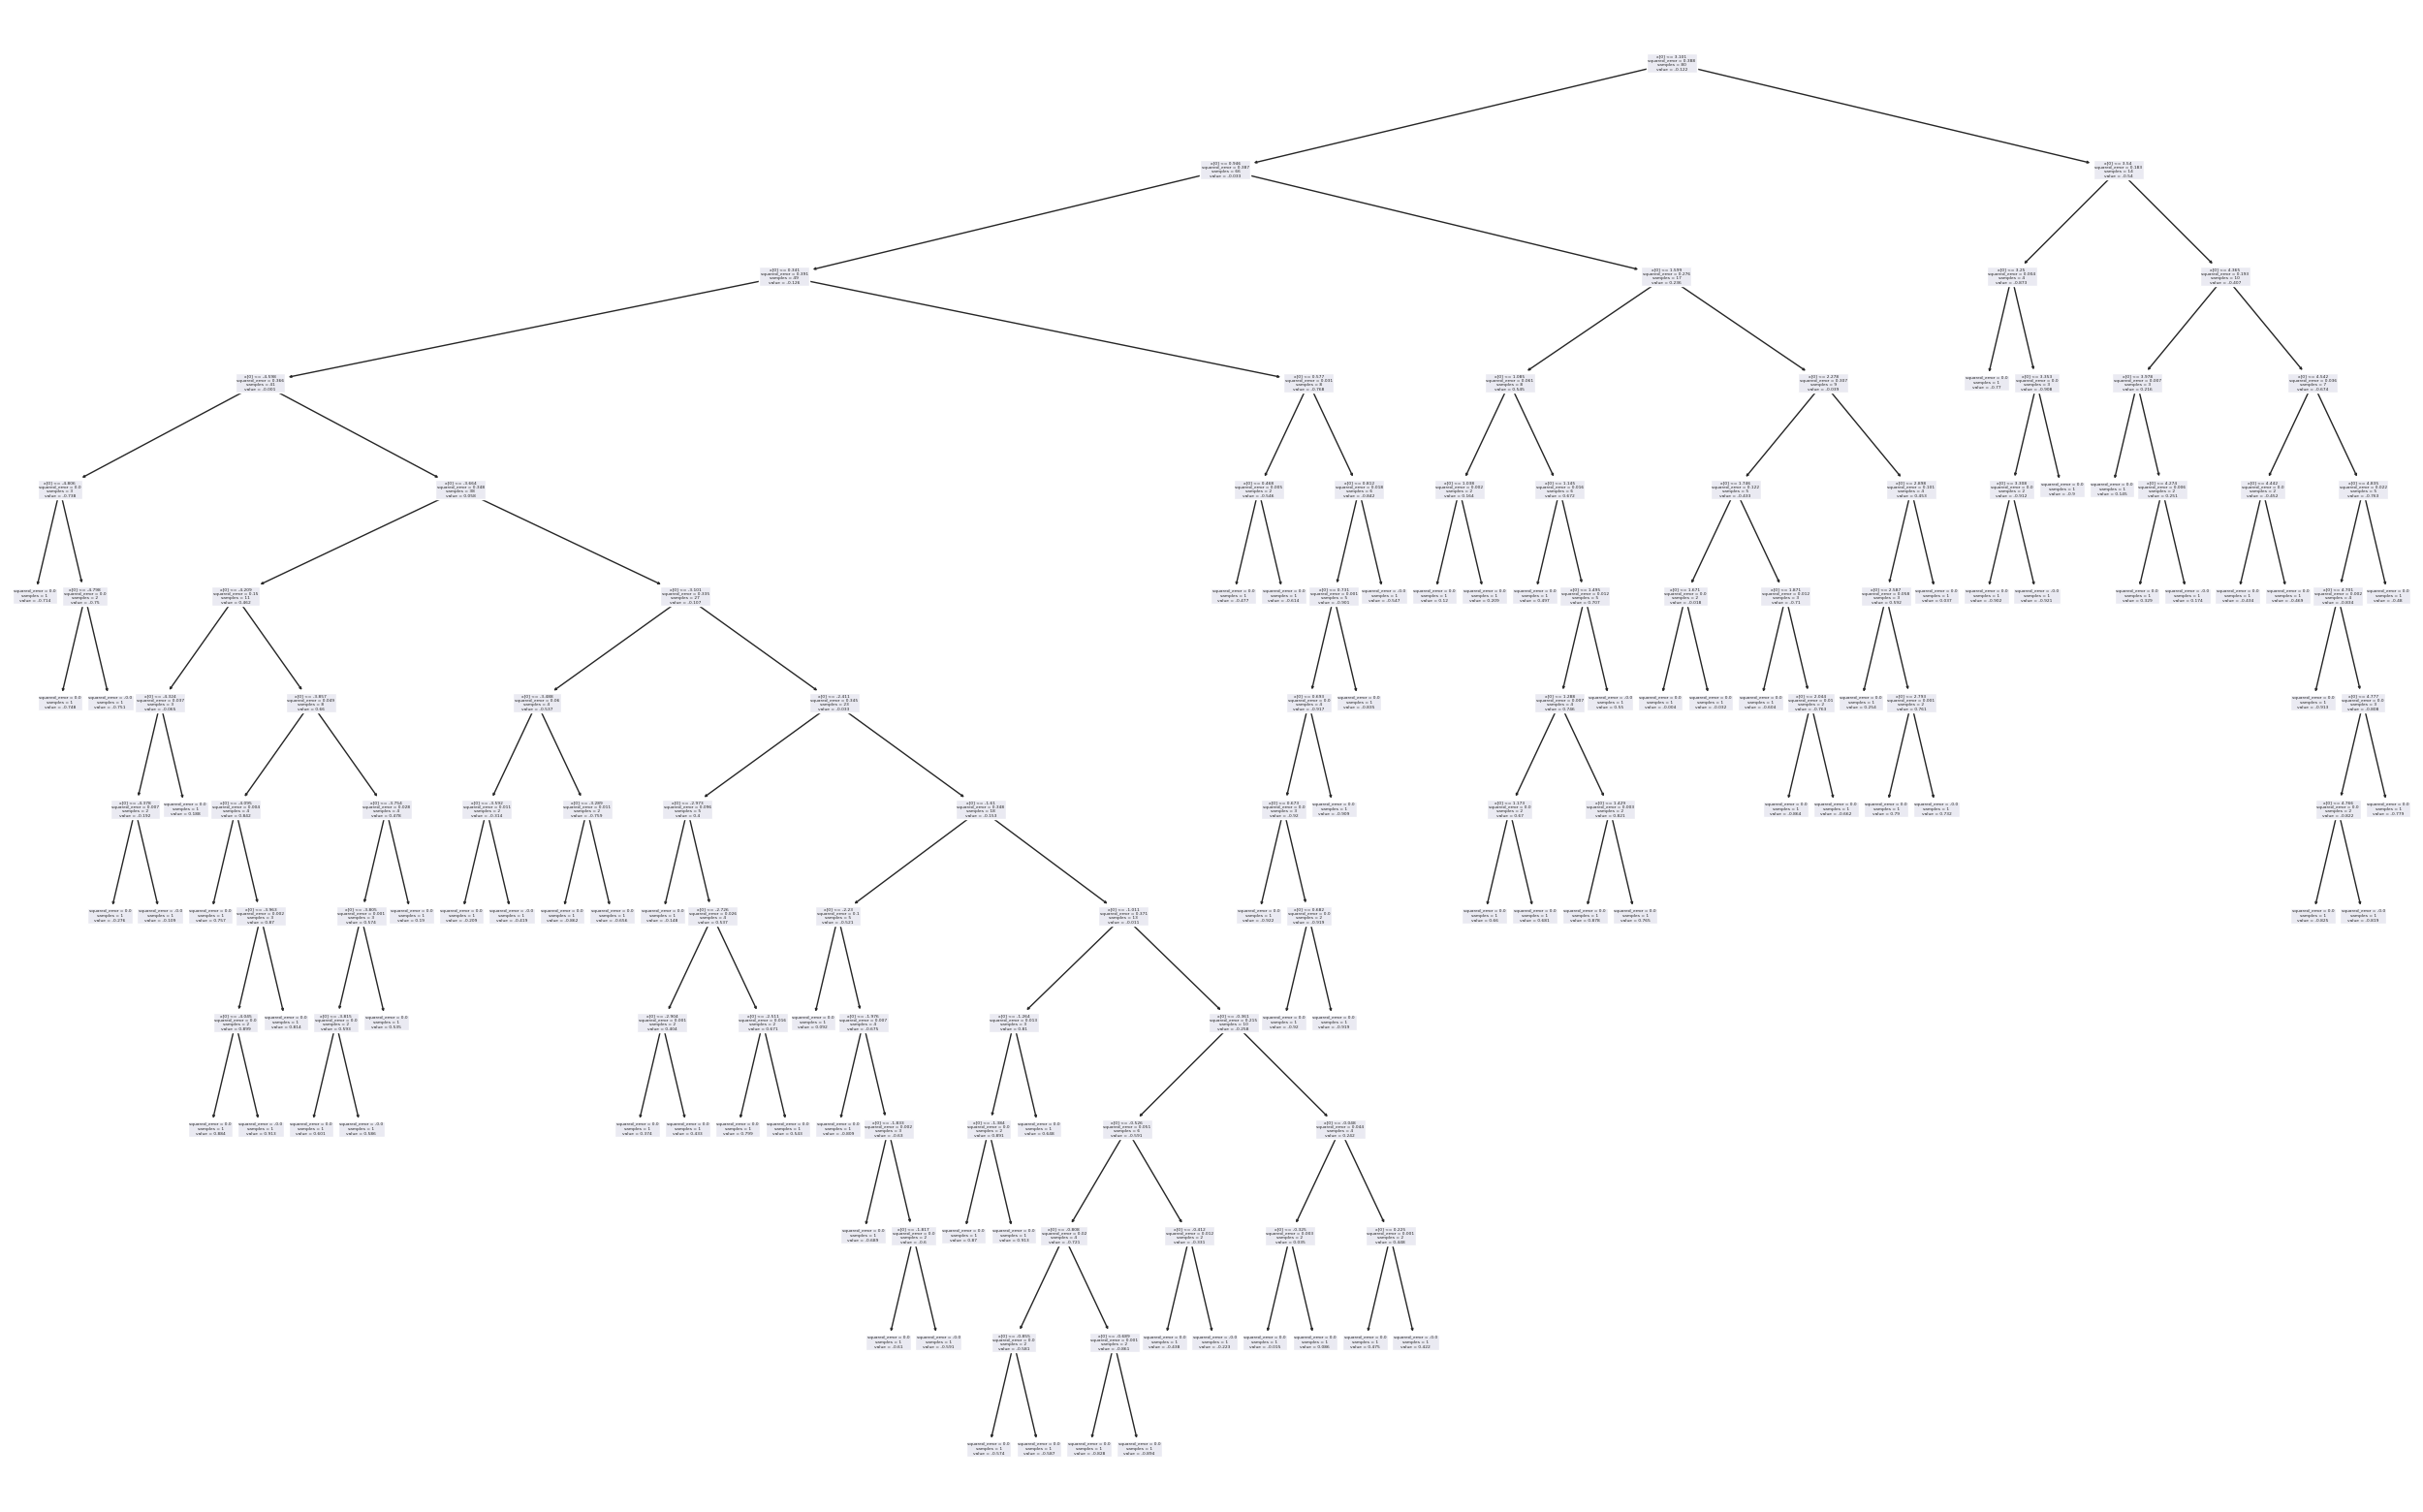

In [18]:
plt.figure(figsize =(32, 20))
res = tree.plot_tree(dtree)

## Train a linear regressor, predict and measure the performance

In [19]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [20]:
y_mse_lin = mean_squared_error(y_test, y_pred)
y_mae_lin = mean_absolute_error(y_test, y_pred)

In [21]:
print(f"mse = {y_mse_lin}\nmae = {y_mae_lin}")

mse = 0.5513389948566234
mae = 0.6589285268897602


## Train a polynomial regressor, predict and measure performance

### Blind Shot: Select a polynomial degree and try

In [22]:
regrPoly = make_pipeline(PolynomialFeatures(7), LinearRegression())
regrPoly.fit(X_train, y_train)
y_pred_poly = regrPoly.predict(X_test)

In [23]:
y_mse_poly = mean_squared_error(y_test, y_pred_poly)
y_mae_poly = mean_absolute_error(y_test, y_pred_poly)

In [24]:
print(f"mse = {y_mse_poly}\nmae = {y_mae_poly}")

mse = 0.5226803341155036
mae = 0.654805329874328


### Better approach: Let Python find a good degree

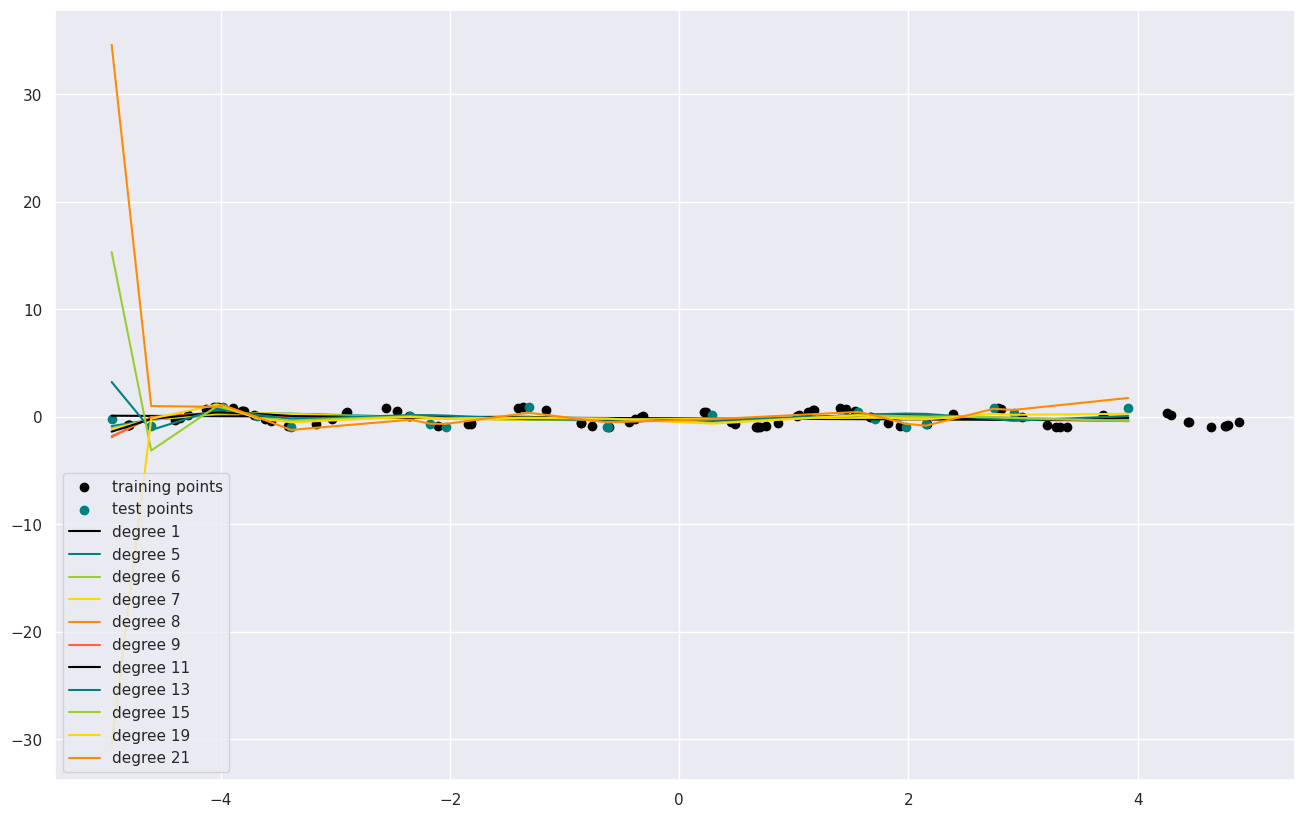

In [25]:
# plot function
fig, ax = plt.subplots(figsize=(16,10))
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)

# plot training points
ax.scatter(X_train, y_train, label="training points")
ax.scatter(X_test, y_test, label="test points")

mse_poly_train = []
mse_poly_test = []
# polynomial features
#for degree in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
for degree in [1, 5, 6, 7, 8, 9, 11, 13, 15, 19, 21]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_plot = model.predict(X_test)
    mse_poly_train.append(mean_squared_error(y_train, model.predict(X_train)))
    mse_poly_test.append(mean_squared_error(y_test, model.predict(X_test)))
    ax.plot(X_test, y_plot, label=f"degree {degree}")
ax.legend(loc="lower left")
plt.show()

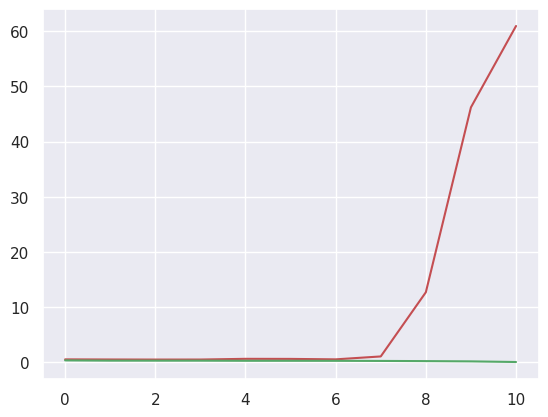

In [26]:
plt.plot(mse_poly_test, color="r")
plt.plot(mse_poly_train, color="g")

In [27]:
print(mse_poly_test)

[0.5513389948566234, 0.5309244276553745, 0.517586856192819, 0.5226803341155036, 0.6509281991291773, 0.6382650128324288, 0.5559500820375942, 1.083568490195185, 12.708497021662758, 46.193365543378846, 60.9267041484155]


## Perform a gaussian regression

In [28]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """
    Transforms a given interval from the one-dimensional input space X
    into a uniformly spaced Gaussian features distribution.
    The X must be an np.array-like in rows first shape X.shape(n_samples, 1)
    see: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb
         for more details on kernel definition (code was partially taken from there)
    """
    
    def __init__(self, N, width_factor=2.0):
        if (N<2):
            raise ValueError("Number of Gaussian Kernels must be at least 2")
        self.N = N # N is the number of kernels
        self.width_factor = width_factor # the width of the kernel
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        # effectively computes 1/2*exp(SUM_i(x_i-center)^2/width^2) 
        # where x_i is a feature in a sample vector x
        # hence the gaussian kernel is placed at center position y in 
        # every dimension having identical std_dev in every dimension
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        print(self.centers_)
        # scale std deviation of gaussian kernels according to distance between kernels
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        # transforms the 2D festure matrix into a 3D matrix
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
        

In [29]:
regrRBF = make_pipeline(GaussianFeatures(13), LinearRegression())

In [30]:
regrRBF.fit(X_train, y_train)
y_pred_RBF = regrRBF.predict(np.array(X_test))

[-4.812102   -4.0041153  -3.1961286  -2.3881419  -1.5801552  -0.77216851
  0.03581819  0.84380489  1.65179159  2.45977829  3.26776498  4.07575168
  4.88373838]


In [31]:
mean_squared_error(y_test, y_pred_RBF)

0.48759882203755656

In [32]:
mse_poly_test

[0.5513389948566234,
 0.5309244276553745,
 0.517586856192819,
 0.5226803341155036,
 0.6509281991291773,
 0.6382650128324288,
 0.5559500820375942,
 1.083568490195185,
 12.708497021662758,
 46.193365543378846,
 60.9267041484155]

## Perform Kernel Ridge Regression with Hyperparameter Optimization

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

In [34]:
krr = GridSearchCV(
    KernelRidge(),
    param_grid={"kernel":["rbf", "polynomial", "cosine"], "degree":[7, 9, 11, 15, 21], "alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
    verbose = 2
)

krr.fit(X_train, y_train)

y_pred_krr = krr.best_estimator_.predict(X_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END ........alpha=1.0, degree=7, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=7, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=7, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=7, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=7, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .alpha=1.0, degree=7, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END .alpha=1.0, degree=7, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END .alpha=1.0, degree=7, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END .alpha=1.0, degree=7, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END .alpha=1.0, degree=7, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END .....alpha=1.0, degree=7, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END .....alpha=1.0, degree=7, gamma=0.01

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ....alpha=1.0, degree=7, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=7, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=7, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=7, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=7, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ........alpha=1.0, degree=9, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=9, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=9, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=9, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........alpha=1.0, degree=9, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .alpha=1.0, degree=9, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END .alpha=1.0, degree=9, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END .alpha=1.0, degree=

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ....alpha=1.0, degree=9, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=9, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=9, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=9, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=9, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END .......alpha=1.0, degree=11, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......alpha=1.0, degree=11, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......alpha=1.0, degree=11, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......alpha=1.0, degree=11, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......alpha=1.0, degree=11, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END alpha=1.0, degree=11, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=1.0, degree=11, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=1.0, degree=1

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ....alpha=1.0, degree=15, gamma=10.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=15, gamma=10.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=15, gamma=10.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=15, gamma=10.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=1.0, degree=15, gamma=10.0, kernel=cosine; total time=   0.0s
[CV] END ......alpha=1.0, degree=15, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=1.0, degree=15, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=1.0, degree=15, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=1.0, degree=15, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=1.0, degree=15, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END alpha=1.0, degree=15, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=1.0, degree=15, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=1.0, degree

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END .....alpha=0.1, degree=7, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END .....alpha=0.1, degree=7, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END .....alpha=0.1, degree=7, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END .........alpha=0.1, degree=7, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........alpha=0.1, degree=7, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........alpha=0.1, degree=7, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........alpha=0.1, degree=7, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........alpha=0.1, degree=7, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..alpha=0.1, degree=7, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END ..alpha=0.1, degree=7, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END ..alpha=0.1, degree=7, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END ..alpha=0.1, degree=7, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END ..alpha=0.1, degree

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ......alpha=0.1, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.1, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.1, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.1, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.1, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END alpha=0.1, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.1, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.1, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.1, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.1, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END ...alpha=0.1, degree=11, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ...alpha=0.1, degree=11, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ...alpha=0.1, 

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ....alpha=0.1, degree=21, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END ........alpha=0.1, degree=21, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........alpha=0.1, degree=21, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........alpha=0.1, degree=21, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........alpha=0.1, degree=21, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........alpha=0.1, degree=21, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .alpha=0.1, degree=21, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END .alpha=0.1, degree=21, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END .alpha=0.1, degree=21, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END .alpha=0.1, degree=21, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END .alpha=0.1, degree=21, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END .....alpha=0.1, degree=21, gamma=0.1, kernel=cosine; total time=   0.0s
[CV] END .....alpha=0.1, deg

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ......alpha=0.01, degree=9, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.01, degree=9, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.01, degree=9, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.01, degree=9, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.01, degree=9, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END alpha=0.01, degree=9, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=9, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=9, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=9, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=9, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END ...alpha=0.01, degree=9, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ...alpha=0.01, degree=9, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ...alpha=0.01,

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ...alpha=0.01, degree=15, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END ...alpha=0.01, degree=15, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END ...alpha=0.01, degree=15, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END .......alpha=0.01, degree=15, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......alpha=0.01, degree=15, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......alpha=0.01, degree=15, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......alpha=0.01, degree=15, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......alpha=0.01, degree=15, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END alpha=0.01, degree=15, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=15, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=15, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=15, gamma=0.1, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ..alpha=0.01, degree=15, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END ......alpha=0.01, degree=21, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.01, degree=21, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.01, degree=21, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.01, degree=21, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.01, degree=21, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END alpha=0.01, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.01, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END ...alpha=0.01, degree=21, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END ...alpha=0.01,

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ....alpha=0.001, degree=9, gamma=1.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=0.001, degree=9, gamma=1.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=0.001, degree=9, gamma=1.0, kernel=cosine; total time=   0.0s
[CV] END ......alpha=0.001, degree=9, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.001, degree=9, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.001, degree=9, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.001, degree=9, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END ......alpha=0.001, degree=9, gamma=10.0, kernel=rbf; total time=   0.0s
[CV] END alpha=0.001, degree=9, gamma=10.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=9, gamma=10.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=9, gamma=10.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=9, gamma=10.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, de

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END ..alpha=0.001, degree=11, gamma=10.0, kernel=cosine; total time=   0.0s
[CV] END ....alpha=0.001, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ....alpha=0.001, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ....alpha=0.001, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ....alpha=0.001, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END ....alpha=0.001, degree=11, gamma=100.0, kernel=rbf; total time=   0.0s
[CV] END alpha=0.001, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=11, gamma=100.0, kernel=polynomial; total time=   0.0s
[CV] END .alpha=0.001, degree=11, gamma=100.0, kernel=cosine; total time=   0.0s
[CV] END .alp

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular mat

[CV] END .....alpha=0.001, degree=21, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....alpha=0.001, degree=21, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....alpha=0.001, degree=21, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END alpha=0.001, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END alpha=0.001, degree=21, gamma=0.01, kernel=polynomial; total time=   0.0s
[CV] END ..alpha=0.001, degree=21, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END ..alpha=0.001, degree=21, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END ..alpha=0.001, degree=21, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END ..alpha=0.001, degree=21, gamma=0.01, kernel=cosine; total time=   0.0s
[CV] END ..alpha=0

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/home/chris/.local/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.



In [35]:
mean_squared_error(y_test, y_pred_krr)

0.0009427864358953336

In [36]:
krr.best_params_

{'alpha': 0.001, 'degree': 7, 'gamma': 1.0, 'kernel': 'rbf'}

In [37]:
krr.best_estimator_.get_params()

{'alpha': 0.001,
 'coef0': 1,
 'degree': 7,
 'gamma': 1.0,
 'kernel': 'rbf',
 'kernel_params': None}